In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
warnings.filterwarnings('ignore')

# import boston map
boston_map = gpd.read_file('Boston_Neighborhoods/Boston_Neighborhoods.shp')

In [2]:
# import master dataframe
master_df = pd.read_csv('data/master_df.csv')

# drop rows with NaN
# master_df.dropna(how='any',axis=0, inplace=True) 

# drop index
master_df.drop(master_df.columns[0], axis=1, inplace=True)
master_df.drop(['OFFENSE_CODE_GROUP'], axis=1, inplace=True)

# one hot encode days of the week, month
# master_df = pd.get_dummies(master_df, columns=['DAY_OF_WEEK','MONTH'])

In [3]:
master_df.head()

,Lat,Long,MONTH,DAY_OF_WEEK,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,SHOOTING,UCR_PART,OFFENSE_DESCRIPTION
0,42.259518,-71.121563,10,Sunday,9,59.0,0.00,0.0,454000.0,4.406696e+05,0.001234,563.0,0,Part One,AUTO THEFT
1,42.262092,-71.116710,10,Saturday,20,56.0,0.01,0.0,541300.0,4.528877e+05,0.000539,531.0,0,Part One,AUTO THEFT
2,42.352375,-71.135096,10,Saturday,15,56.0,0.01,0.0,259900.0,5.895101e+05,0.000167,1272.0,0,Part One,AUTO THEFT - LEASED/RENTED VEHICLE
3,42.349476,-71.076402,10,Saturday,4,56.0,0.01,0.0,492000.0,1.666753e+06,0.000074,4461.0,0,Part One,AUTO THEFT
4,42.381846,-71.066551,10,Wednesday,8,71.0,0.22,0.0,836900.0,6.054951e+05,0.000108,2672.0,0,Part One,AUTO THEFT - LEASED/RENTED VEHICLE


In [4]:
labels = pd.read_csv('data/list_of_offence_codes.csv')
labels.drop(['Unnamed: 0'],axis=1,inplace=True)
labels.columns = ['OFFENSE_DESCRIPTION','category','number']
labels[['OFFENSE_DESCRIPTION','category']].head()

,OFFENSE_DESCRIPTION,category
0,BURGLARY - RESIDENTIAL - FORCE,burglary
1,BURGLARY - RESIDENTIAL - NO FORCE,burglary
2,BURGLARY - COMMERICAL - FORCE,burglary
3,BURGLARY - RESIDENTIAL - ATTEMPT,burglary
4,BURGLARY - COMMERICAL - NO FORCE,burglary


In [5]:
new = master_df.merge(labels[['OFFENSE_DESCRIPTION','category']],on='OFFENSE_DESCRIPTION',how="left")
new.dropna(how='any',axis=0, inplace=True)
new = new[new.category != 'drop']
new = new[new.category != 'property']
new = new[new.category != 'white collar']
new = new[new.category != 'no lisence']
new = new[new.category != 'fire']
new = new[new.OFFENSE_DESCRIPTION != 'VERBAL DISPUTE']
new.drop(['UCR_PART','OFFENSE_DESCRIPTION'],axis=1,inplace=True)

In [15]:
41867 / sum(new.category.value_counts())

new.category.value_counts()

theft                 41867
domestic              37742
violent               33606
medical               27298
vandalism             23527
mv accident           22040
petty theft           22006
drugs                 19463
burglary               9311
possession weapons     4972
civil disruption       4327
Name: category, dtype: int64

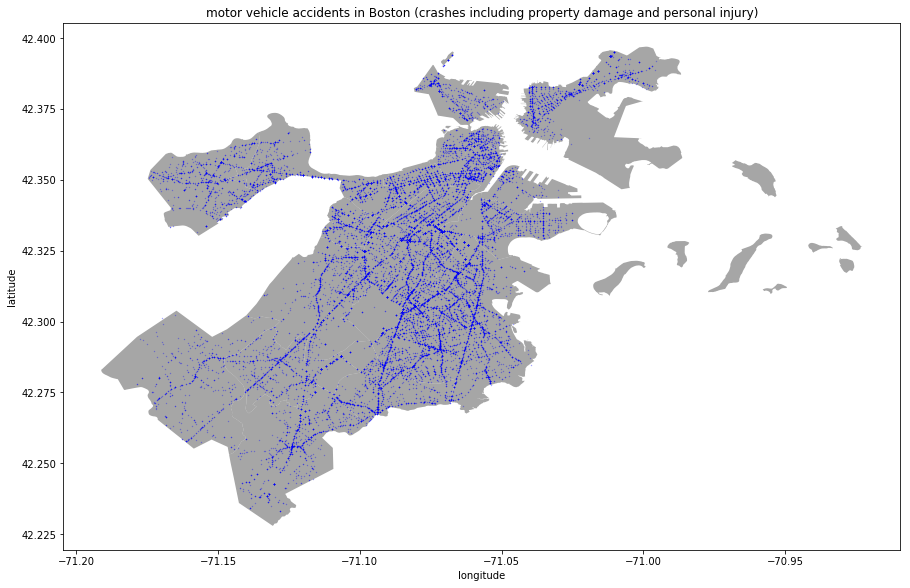

In [19]:
geometry = [Point(xy) for xy in zip(new.Long,new.Lat)]
geo_df   = gpd.GeoDataFrame(new['category'],crs={'init': 'epsg:4326'},geometry=geometry)

fig,ax = plt.subplots(figsize=(15,15))

# plot on same map full size to see where shootings are
boston_map.plot(ax=ax,alpha=0.7,color='grey')
geo_df[geo_df['category'] == 'mv accident'].plot(ax=ax,markersize=0.1,color='blue',label='no shooting',alpha=0.5)

# plot formatting
plt.title('motor vehicle accidents in Boston (crashes including property damage and personal injury)')
plt.xlabel('longitude'); plt.ylabel('latitude');
plt.show()

# save to .jpg file for later
fig.savefig('eda_images/mv_accidents.jpg')

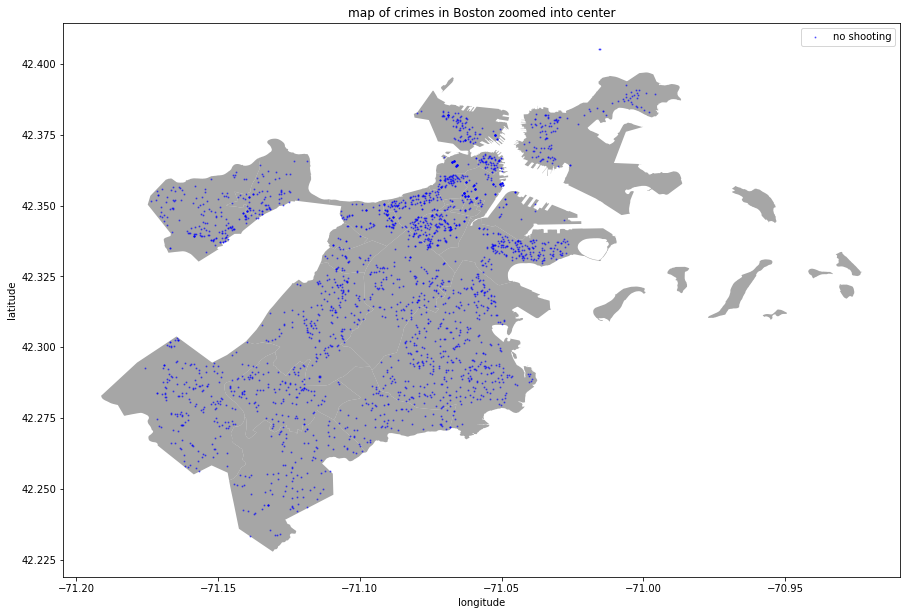

In [117]:
property_sample = pd.read_csv('data/property_sample.csv')

geometry = [Point(xy) for xy in zip(property_sample.Longitude,property_sample.Latitude)]
geo_df   = gpd.GeoDataFrame(property_sample['AV_TOTAL'],crs={'init': 'epsg:4326'},geometry=geometry)

fig,ax = plt.subplots(figsize=(15,15))

# plot on same map full size to see where shootings are
boston_map.plot(ax=ax,alpha=0.7,color='grey')
geo_df.plot(ax=ax,markersize=1,color='blue',label='no shooting',alpha=0.5)
# geo_df[geo_df['category'] == 1].plot(ax=ax,markersize=10,color='red',label='shooting')

# plot formatting
plt.title('map of crimes in Boston zoomed into center')
plt.xlabel('longitude'); plt.ylabel('latitude');
plt.legend()
plt.show()

,Unnamed: 0,AV_TOTAL,Latitude,Longitude
0,0,316400,42.341360,-71.080400
1,1,1036600,42.351890,-71.081440
2,2,2108600,42.345012,-71.070418
3,3,868100,42.346326,-71.148995
4,4,670800,42.270946,-71.165804


In [106]:
new.to_csv('data/test_master.csv')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

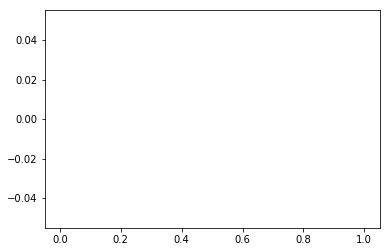

In [91]:
plt.hist(new[new.category == 'burglary'].HOUR)

(array([1921.,  397.,  309., 1892., 2148., 2980., 4689., 3179., 2479.,
        2012.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

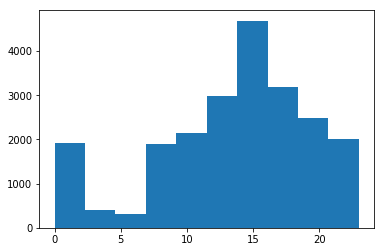

In [100]:
plt.hist(new[new.category == 'petty theft'].HOUR)

In [95]:
new.category.unique()

array(['theft', 'vandalism', 'mv accident', 'violent', 'burglary ',
       'property', 'possession weapons', 'medical', 'domestic',
       'petty theft', 'no lisence', 'drugs', 'fire', 'white collar',
       'civil disruption'], dtype=object)